# Linear Regression for predicting weather.

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv('weather.csv')

In [3]:
df
df.dropna()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow
0,8.0,24.3,0.0,3.4,6.3,NW,30.0,SW,NW,6.0,...,29,1019.7,1015.0,7,7,14.4,23.6,No,3.6,Yes
1,14.0,26.9,3.6,4.4,9.7,ENE,39.0,E,W,4.0,...,36,1012.4,1008.4,5,3,17.5,25.7,Yes,3.6,Yes
2,13.7,23.4,3.6,5.8,3.3,NW,85.0,N,NNE,6.0,...,69,1009.5,1007.2,8,7,15.4,20.2,Yes,39.8,Yes
3,13.3,15.5,39.8,7.2,9.1,NW,54.0,WNW,W,30.0,...,56,1005.5,1007.0,2,7,13.5,14.1,Yes,2.8,Yes
4,7.6,16.1,2.8,5.6,10.6,SSE,50.0,SSE,ESE,20.0,...,49,1018.3,1018.5,7,7,11.1,15.4,Yes,0.0,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
361,9.0,30.7,0.0,7.6,12.1,NNW,76.0,SSE,NW,7.0,...,15,1016.1,1010.8,1,3,20.4,30.0,No,0.0,No
362,7.1,28.4,0.0,11.6,12.7,N,48.0,NNW,NNW,2.0,...,22,1020.0,1016.9,0,1,17.2,28.2,No,0.0,No
363,12.5,19.9,0.0,8.4,5.3,ESE,43.0,ENE,ENE,11.0,...,47,1024.0,1022.8,3,2,14.5,18.3,No,0.0,No
364,12.5,26.9,0.0,5.0,7.1,NW,46.0,SSW,WNW,6.0,...,39,1021.0,1016.2,6,7,15.8,25.9,No,0.0,No


In [6]:
df.head()


,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow
0,8.0,24.3,0.0,3.4,6.3,NW,30.0,SW,NW,6.0,...,29,1019.7,1015.0,7,7,14.4,23.6,No,3.6,Yes
1,14.0,26.9,3.6,4.4,9.7,ENE,39.0,E,W,4.0,...,36,1012.4,1008.4,5,3,17.5,25.7,Yes,3.6,Yes
2,13.7,23.4,3.6,5.8,3.3,NW,85.0,N,NNE,6.0,...,69,1009.5,1007.2,8,7,15.4,20.2,Yes,39.8,Yes
3,13.3,15.5,39.8,7.2,9.1,NW,54.0,WNW,W,30.0,...,56,1005.5,1007.0,2,7,13.5,14.1,Yes,2.8,Yes
4,7.6,16.1,2.8,5.6,10.6,SSE,50.0,SSE,ESE,20.0,...,49,1018.3,1018.5,7,7,11.1,15.4,Yes,0.0,No


In [7]:
x=df.iloc[:,[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20]].values
y=df.iloc[:,-1].values

In [8]:
print(x)

[[8.0 24.3 0.0 ... 23.6 'No' 3.6]
 [14.0 26.9 3.6 ... 25.7 'Yes' 3.6]
 [13.7 23.4 3.6 ... 20.2 'Yes' 39.8]
 ...
 [12.5 19.9 0.0 ... 18.3 'No' 0.0]
 [12.5 26.9 0.0 ... 25.9 'No' 0.0]
 [12.3 30.2 0.0 ... 28.6 'No' 0.0]]


In [9]:
y = y.reshape(-1,1)
print(y)

[['Yes']
 ['Yes']
 ['Yes']
 ['Yes']
 ['No']
 ['No']
 ['No']
 ['No']
 ['Yes']
 ['No']
 ['No']
 ['No']
 ['No']
 ['No']
 ['No']
 ['No']
 ['Yes']
 ['No']
 ['No']
 ['No']
 ['No']
 ['Yes']
 ['No']
 ['No']
 ['No']
 ['No']
 ['No']
 ['No']
 ['No']
 ['Yes']
 ['Yes']
 ['No']
 ['Yes']
 ['No']
 ['No']
 ['No']
 ['Yes']
 ['No']
 ['No']
 ['No']
 ['No']
 ['No']
 ['No']
 ['No']
 ['Yes']
 ['Yes']
 ['No']
 ['No']
 ['Yes']
 ['Yes']
 ['Yes']
 ['Yes']
 ['No']
 ['Yes']
 ['No']
 ['No']
 ['Yes']
 ['No']
 ['No']
 ['No']
 ['No']
 ['No']
 ['No']
 ['No']
 ['No']
 ['No']
 ['No']
 ['No']
 ['No']
 ['No']
 ['No']
 ['No']
 ['Yes']
 ['No']
 ['No']
 ['No']
 ['Yes']
 ['No']
 ['Yes']
 ['Yes']
 ['No']
 ['No']
 ['No']
 ['No']
 ['No']
 ['No']
 ['No']
 ['No']
 ['No']
 ['No']
 ['Yes']
 ['Yes']
 ['No']
 ['No']
 ['Yes']
 ['Yes']
 ['No']
 ['No']
 ['Yes']
 ['No']
 ['No']
 ['No']
 ['Yes']
 ['Yes']
 ['No']
 ['No']
 ['No']
 ['No']
 ['No']
 ['No']
 ['No']
 ['Yes']
 ['Yes']
 ['No']
 ['No']
 ['No']
 ['No']
 ['No']
 ['No']
 ['Yes']
 ['No']

In [10]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values=np.nan,strategy='most_frequent')
x = imputer.fit_transform(x)
y = imputer.fit_transform(y)

In [11]:
print(x)

[[8.0 24.3 0.0 ... 23.6 'No' 3.6]
 [14.0 26.9 3.6 ... 25.7 'Yes' 3.6]
 [13.7 23.4 3.6 ... 20.2 'Yes' 39.8]
 ...
 [12.5 19.9 0.0 ... 18.3 'No' 0.0]
 [12.5 26.9 0.0 ... 25.9 'No' 0.0]
 [12.3 30.2 0.0 ... 28.6 'No' 0.0]]


In [12]:
print(y)

[['Yes']
 ['Yes']
 ['Yes']
 ['Yes']
 ['No']
 ['No']
 ['No']
 ['No']
 ['Yes']
 ['No']
 ['No']
 ['No']
 ['No']
 ['No']
 ['No']
 ['No']
 ['Yes']
 ['No']
 ['No']
 ['No']
 ['No']
 ['Yes']
 ['No']
 ['No']
 ['No']
 ['No']
 ['No']
 ['No']
 ['No']
 ['Yes']
 ['Yes']
 ['No']
 ['Yes']
 ['No']
 ['No']
 ['No']
 ['Yes']
 ['No']
 ['No']
 ['No']
 ['No']
 ['No']
 ['No']
 ['No']
 ['Yes']
 ['Yes']
 ['No']
 ['No']
 ['Yes']
 ['Yes']
 ['Yes']
 ['Yes']
 ['No']
 ['Yes']
 ['No']
 ['No']
 ['Yes']
 ['No']
 ['No']
 ['No']
 ['No']
 ['No']
 ['No']
 ['No']
 ['No']
 ['No']
 ['No']
 ['No']
 ['No']
 ['No']
 ['No']
 ['No']
 ['Yes']
 ['No']
 ['No']
 ['No']
 ['Yes']
 ['No']
 ['Yes']
 ['Yes']
 ['No']
 ['No']
 ['No']
 ['No']
 ['No']
 ['No']
 ['No']
 ['No']
 ['No']
 ['No']
 ['Yes']
 ['Yes']
 ['No']
 ['No']
 ['Yes']
 ['Yes']
 ['No']
 ['No']
 ['Yes']
 ['No']
 ['No']
 ['No']
 ['Yes']
 ['Yes']
 ['No']
 ['No']
 ['No']
 ['No']
 ['No']
 ['No']
 ['No']
 ['Yes']
 ['Yes']
 ['No']
 ['No']
 ['No']
 ['No']
 ['No']
 ['No']
 ['Yes']
 ['No']

In [13]:
from sklearn.preprocessing import LabelEncoder

In [14]:
Label1=LabelEncoder()
x[:,5]=Label1.fit_transform(x[:,5])

Label2=LabelEncoder()
x[:,7]=Label2.fit_transform(x[:,7])

Label3=LabelEncoder()
x[:,8]=Label3.fit_transform(x[:,8])

Label4=LabelEncoder()
x[:,-2]=Label4.fit_transform(x[:,-2])

Label6=LabelEncoder()
y=Label6.fit_transform(y)


F:\Anaconda\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


In [15]:
print(x)


[[8.0 24.3 0.0 ... 23.6 0 3.6]
 [14.0 26.9 3.6 ... 25.7 1 3.6]
 [13.7 23.4 3.6 ... 20.2 1 39.8]
 ...
 [12.5 19.9 0.0 ... 18.3 0 0.0]
 [12.5 26.9 0.0 ... 25.9 0 0.0]
 [12.3 30.2 0.0 ... 28.6 0 0.0]]


In [16]:
print(y)

[1 1 1 1 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 1 1 0 1 0 0 0 1
 0 0 0 0 0 0 0 1 1 0 0 1 1 1 1 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0
 0 0 1 0 1 1 0 0 0 0 0 0 0 0 0 0 1 1 0 0 1 1 0 0 1 0 0 0 1 1 0 0 0 0 0 0 0
 1 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0
 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 1 0 0 0 0 0 1
 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0
 0 1 0 1 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 1 0 0 0 0 0 0
 0 0 0 0 1 1 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


In [17]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x = sc.fit_transform(x)

In [18]:
print(x)

[[ 0.12204713  0.5612213  -0.33848522 ...  0.65886728 -0.46904158
   0.51459076]
 [ 1.11912864  0.95036308  0.51459076 ...  0.97554878  2.13200716
   0.51459076]
 [ 1.06927456  0.42651837  0.51459076 ...  0.14614485  2.13200716
   9.0927437 ]
 ...
 [ 0.86985826 -0.09732634 -0.33848522 ... -0.14037651 -0.46904158
  -0.33848522]
 [ 0.86985826  0.95036308 -0.33848522 ...  1.00570892 -0.46904158
  -0.33848522]
 [ 0.83662221  1.44427381 -0.33848522 ...  1.41287086 -0.46904158
  -0.33848522]]


In [19]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)
print(x_train)

[[ 1.43487111  0.42651837 -0.33848522 ...  0.46282635 -0.46904158
  -0.33848522]
 [-1.00797857 -0.68103902 -0.33848522 ... -0.69833916 -0.46904158
  -0.33848522]
 [-1.19077684 -0.57627007 -0.33848522 ... -0.65309895 -0.46904158
  -0.33848522]
 ...
 [ 0.95294839  1.14493397 -0.33848522 ...  1.17158971 -0.46904158
  -0.33848522]
 [ 0.03895701  0.05234358 -0.33848522 ...  0.08582456 -0.46904158
  -0.33848522]
 [-0.80856227  0.0074426  -0.33848522 ...  0.08582456 -0.46904158
  -0.33848522]]


In [20]:
print(y_train)

[0 0 0 1 0 0 1 1 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 1
 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0
 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 1 0 0
 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1
 0 1 0 1 0 0 0 1 1 1 0 0 1 0 0 0 0 1 1 0 0 0 0 0 0 0 1 1 0 0 0 0 0 1 0 0 0
 1 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 1 1 0 1 0 1 1 0 0 1 1 0 0 0 0 0 0 0 0 1 0
 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 1 1 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0]


In [21]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=0)

In [22]:
from sklearn.linear_model import LinearRegression

In [23]:
print(x_train)

[[ 1.43487111  0.42651837 -0.33848522 ...  0.46282635 -0.46904158
  -0.33848522]
 [-1.00797857 -0.68103902 -0.33848522 ... -0.69833916 -0.46904158
  -0.33848522]
 [-1.19077684 -0.57627007 -0.33848522 ... -0.65309895 -0.46904158
  -0.33848522]
 ...
 [ 0.95294839  1.14493397 -0.33848522 ...  1.17158971 -0.46904158
  -0.33848522]
 [ 0.03895701  0.05234358 -0.33848522 ...  0.08582456 -0.46904158
  -0.33848522]
 [-0.80856227  0.0074426  -0.33848522 ...  0.08582456 -0.46904158
  -0.33848522]]


In [24]:
print(y_train)

[0 0 0 1 0 0 1 1 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 1
 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0
 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 1 0 0
 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1
 0 1 0 1 0 0 0 1 1 1 0 0 1 0 0 0 0 1 1 0 0 0 0 0 0 0 1 1 0 0 0 0 0 1 0 0 0
 1 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 1 1 0 1 0 1 1 0 0 1 1 0 0 0 0 0 0 0 0 1 0
 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 1 1 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0]


In [25]:
from sklearn.linear_model import LinearRegression
linear_obj=LinearRegression()
linear_obj.fit(x_train,y_train)

LinearRegression()

In [26]:
linear_obj.score(x_test,y_test)

0.5779420728073297

In [27]:
linear_obj.coef_

array([-0.05008379, -0.00104909,  0.01897924,  0.0716242 , -0.05532373,
       -0.02418136,  0.01853866,  0.0132557 ,  0.03521762,  0.04944606,
       -0.00731587,  0.04240768,  0.06028146,  0.34950517, -0.38164832,
       -0.01577621,  0.03245696,  0.05453906, -0.00167374, -0.00670214,
        0.1778186 ])

In [28]:
len(linear_obj.coef_)

21

In [29]:
linear_obj.intercept_

0.1790361666824963

In [30]:
y_pred=linear_obj.predict(x_test)
y_pred

array([-0.01589309,  0.23081042,  0.48461712,  0.27179079,  1.13932482,
        0.82475491,  0.54069065,  0.20547324, -0.0668744 ,  0.05601925,
       -0.03154124,  0.05010415,  0.00392435, -0.11002992,  0.03222824,
       -0.05318442,  0.11895058,  0.26167775,  0.42039481,  0.26780315,
        0.1219756 ,  0.01878356, -0.00190132,  0.04488126,  0.11202927,
        0.11509966,  0.161159  ,  0.02470033,  0.34304643, -0.0540494 ,
        0.22128895,  0.35129688,  0.34979251,  0.01420325,  0.12124247,
        0.10683827,  0.06745098,  0.14466761, -0.35233791,  0.15628325,
        0.20535891,  0.54518825, -0.10243202,  0.33861897,  0.29990639,
       -0.07296278,  0.17113247,  0.20620563, -0.06589016,  0.16813971,
        0.02381615,  0.07770419,  0.08276394,  0.46641278,  0.04059684,
        0.07467559,  0.15639339, -0.12232936,  0.16454203,  0.62527296,
        1.2549469 ,  0.00806847,  0.12477106,  0.05968416, -0.08168645,
       -0.16811473,  0.88712684,  0.06195855, -0.25969092,  0.18

In [31]:
y_test

array([0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0])

In [34]:
data=pd.DataFrame({'Actual':y_test,'Predict':y_pred})
data1=data.head(15)
data1

,Actual,Predict
0,0,-0.015893
1,0,0.230810
2,1,0.484617
3,0,0.271791
4,1,1.139325
5,1,0.824755
6,1,0.540691
7,0,0.205473
8,0,-0.066874
9,0,0.056019


In [41]:
Y_ACTUAL=data.Actual
Y_ACTUAL

0     0
1     0
2     1
3     0
4     1
     ..
69    0
70    0
71    0
72    0
73    0
Name: Actual, Length: 74, dtype: int32

In [42]:
Y_PREDICT=data.Predict
Y_PREDICT

0    -0.015893
1     0.230810
2     0.484617
3     0.271791
4     1.139325
        ...   
69    0.188300
70    0.240902
71    0.009796
72    0.170016
73    0.050553
Name: Predict, Length: 74, dtype: float64

<AxesSubplot:xlabel='Actual', ylabel='Predict'>

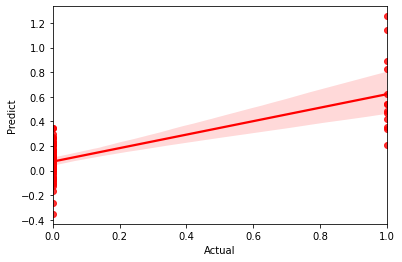

In [44]:
import seaborn as sns 
a=sns.regplot(x=Y_ACTUAL,y=Y_PREDICT,fit_reg=True,color='r')
a

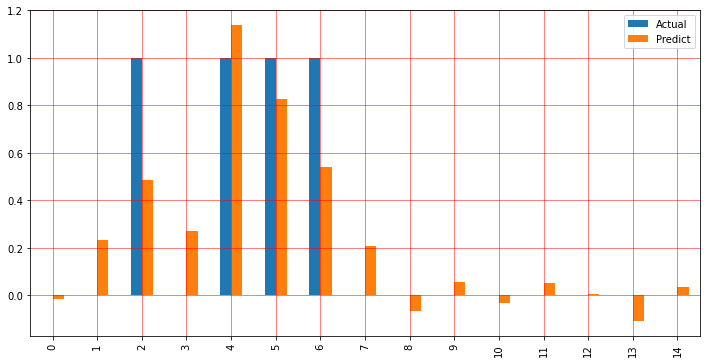

In [45]:
data1.plot(kind='bar',figsize=(12,6))
plt.grid(which='major',linestyle='-',linewidth='0.5',color='r')
plt.grid(which='minor',linestyle=':',linewidth='0.5',color='b')
plt.show()